# Auto-correlation function

![auto-correlation](auto-correlation.png)

## Package inclusion for Python

In [1]:
%matplotlib inline

import copy
import numpy as np
import cv2
from matplotlib import pyplot as plt

Open an image

In [2]:
image = cv2.imread("IMGP1983.JPG", cv2.IMREAD_COLOR)

## Check for errors

In [3]:
# Check for failure
if image is None: 
    raise Exception("Could not open or find the image")

## Display the image

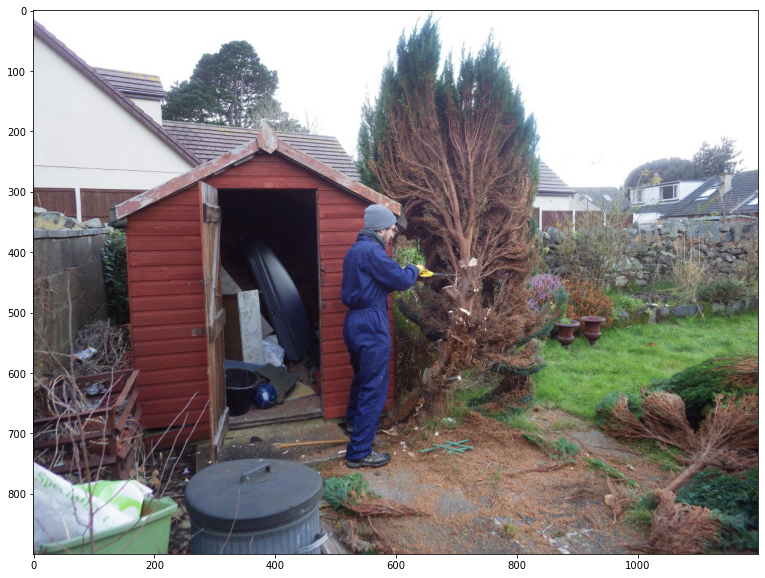

In [4]:
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(im_rgb)
plt.show()

## Function to compute the correlation between two images

$$\mathrm{cov}(Img_1, Img_2) = \frac{\sum_{i=0}^{i<w}\sum_{j=0}^{j<h} (Img_1(i,j) - \mathrm{avg}(Img_1)) \times (Img_2(i,j) - \mathrm{avg}(Img_2))}{w \times h} $$

$$\mathrm{cor}(Img_1, Img_2) = \frac{\mathrm{cov}(Img_1, Img_2)}{\mathrm{std}(Img_1) \times \mathrm{std}(Img2)} $$

In [5]:
def covariance(img1: np.array, img2: np.array) -> float:
    
    # Check if the two images have the same dimension (1-D, 2-D, etc.)
    if len(img1.shape) != len(img2.shape):
        raise Exception("The two images do not have the same dimensions, img1 is", str(len(img1.shape)) + "-D, img2 is", str(len(img2.shape)) + "-D.")
    
    # Check if the two images have the same size for each dimension
    
    for i in range(len(img1.shape)):
        if img1.shape[i] != img2.shape[i]:
            raise Exception("The two images do not have the same size, the size of img1 is", img1.shape, "img2's is", img2.shape)
            
    mean1 = img1.mean()
    mean2 = img2.mean()
    
    return np.mean((img1 - mean1) * (img2 - mean2))

def correlation(img1: np.array, img2: np.array) -> float:
    
    cov = covariance(img1, img2)
    
    std1 = img1.std()
    std2 = img2.std()
    
    correlation = cov / (std1 * std2)
    
    # If std1 or std2 is null, make sure the correlation is 1
    if np.isnan(correlation):
        correlation = 1.0

    return correlation

In [6]:
ROI_half_size = 25

In [7]:
def mouseClick(event, x, y, flags, param):
    
    global image
    
    if event == cv2.EVENT_LBUTTONUP:
        temp1 = copy.deepcopy(image)
        
        # Get the ROI centered on the click
        roi = image[y-ROI_half_size:y+ROI_half_size, x-ROI_half_size:x+ROI_half_size]
        cv2.imshow('ROI', image[y-ROI_half_size:y+ROI_half_size, x-ROI_half_size:x+ROI_half_size])

        # Draw a circle for the click
        cv2.circle(temp1, (x,y), 5, (0,0,255), -1)
        
        # Draw a rectangle for the ROI
        cv2.rectangle(temp1, (x-ROI_half_size,y-ROI_half_size), (x+ROI_half_size,y+ROI_half_size), (0,255,0), 2)
        
        # Get the image of the auto-correlation
        auto_correlation = np.zeros((2 * ROI_half_size, 2 * ROI_half_size))

        # Lag along the y-axis
        l = 0
        for j in range(y-ROI_half_size, y+ROI_half_size, 1):

            # Lag along the x-axis
            k = 0
            for i in range(x-ROI_half_size, x+ROI_half_size, 1):

                # Get the ROI with the lag
                roi_temp = image[j-ROI_half_size: j+ROI_half_size, i-ROI_half_size: i+ROI_half_size]

                # Compute the correlation for this pixel
                cor = correlation(roi, roi_temp)
                auto_correlation[l, k] = cor

                # Display a rectangle
                temp2 = copy.deepcopy(temp1)        
                cv2.rectangle(temp2, (i-ROI_half_size,j-ROI_half_size), (i+ROI_half_size,j+ROI_half_size), (255,255,0), 2)

                # Show the images
                cv2.imshow('auto-correlation', (auto_correlation + 1) / 2)
                cv2.imshow('image', temp2)
                
                # Wait for 1 ms
                cv2.waitKey(1)
                k += 1
            l += 1
                
        cv2.imshow('image', temp1)

In [8]:
cv2.namedWindow('image')
cv2.imshow('image', image)

cv2.setMouseCallback('image', mouseClick)

key = -1

while(key != 27 and key != ord('q')):

    key = cv2.waitKey(0) & 0xFF



## Close the windows

In [9]:
cv2.destroyAllWindows()